In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
WHAT = "Lak"

In [3]:
df_lis_lepsi = pd.read_csv(f"Lepsi_kampan_mereni_{WHAT}.csv")
df_lis_horsi = pd.read_csv(f"Horsi_kampan_mereni_{WHAT}.csv")
prostoje_lepsi = pd.read_csv("Lepší kampaň_prostoje.csv")
prostoje_horsi = pd.read_csv("Horší kampaň_prostoje.csv")

In [4]:
df_lis_lepsi["time"] = pd.to_datetime(df_lis_lepsi["time"])
df_lis_horsi["time"] = pd.to_datetime(df_lis_horsi["time"])

prostoje_lepsi["Start"] = pd.to_datetime(prostoje_lepsi["Start"])
prostoje_lepsi["End"] = pd.to_datetime(prostoje_lepsi["End"])
prostoje_horsi["Start"] = pd.to_datetime(prostoje_horsi["Start"])
prostoje_horsi["End"] = pd.to_datetime(prostoje_horsi["End"])

In [5]:
variables = df_lis_lepsi["variable"].unique()
variables

array(['Porozita 0200 (Porosita_0200)',
       'Váha nelakované plechovky (Vaha_nelak_plech)',
       'Váha laku (Vaha_laku)', 'Váha laku g/m2 (Vaha_laku_g/m2)',
       'Teplota mycí lázně vnitřní lak (T_myci_lazen_vnitrni_lak)',
       'Teplota pece vnitřní lak (T_pec_vnitrni_lak)'], dtype=object)

In [6]:
import warnings
warnings.filterwarnings('ignore')

Porozita 0200 (Porosita_0200)
Váha nelakované plechovky (Vaha_nelak_plech)
Váha laku (Vaha_laku)
Váha laku g/m2 (Vaha_laku_g/m2)
Teplota mycí lázně vnitřní lak (T_myci_lazen_vnitrni_lak)
Teplota pece vnitřní lak (T_pec_vnitrni_lak)


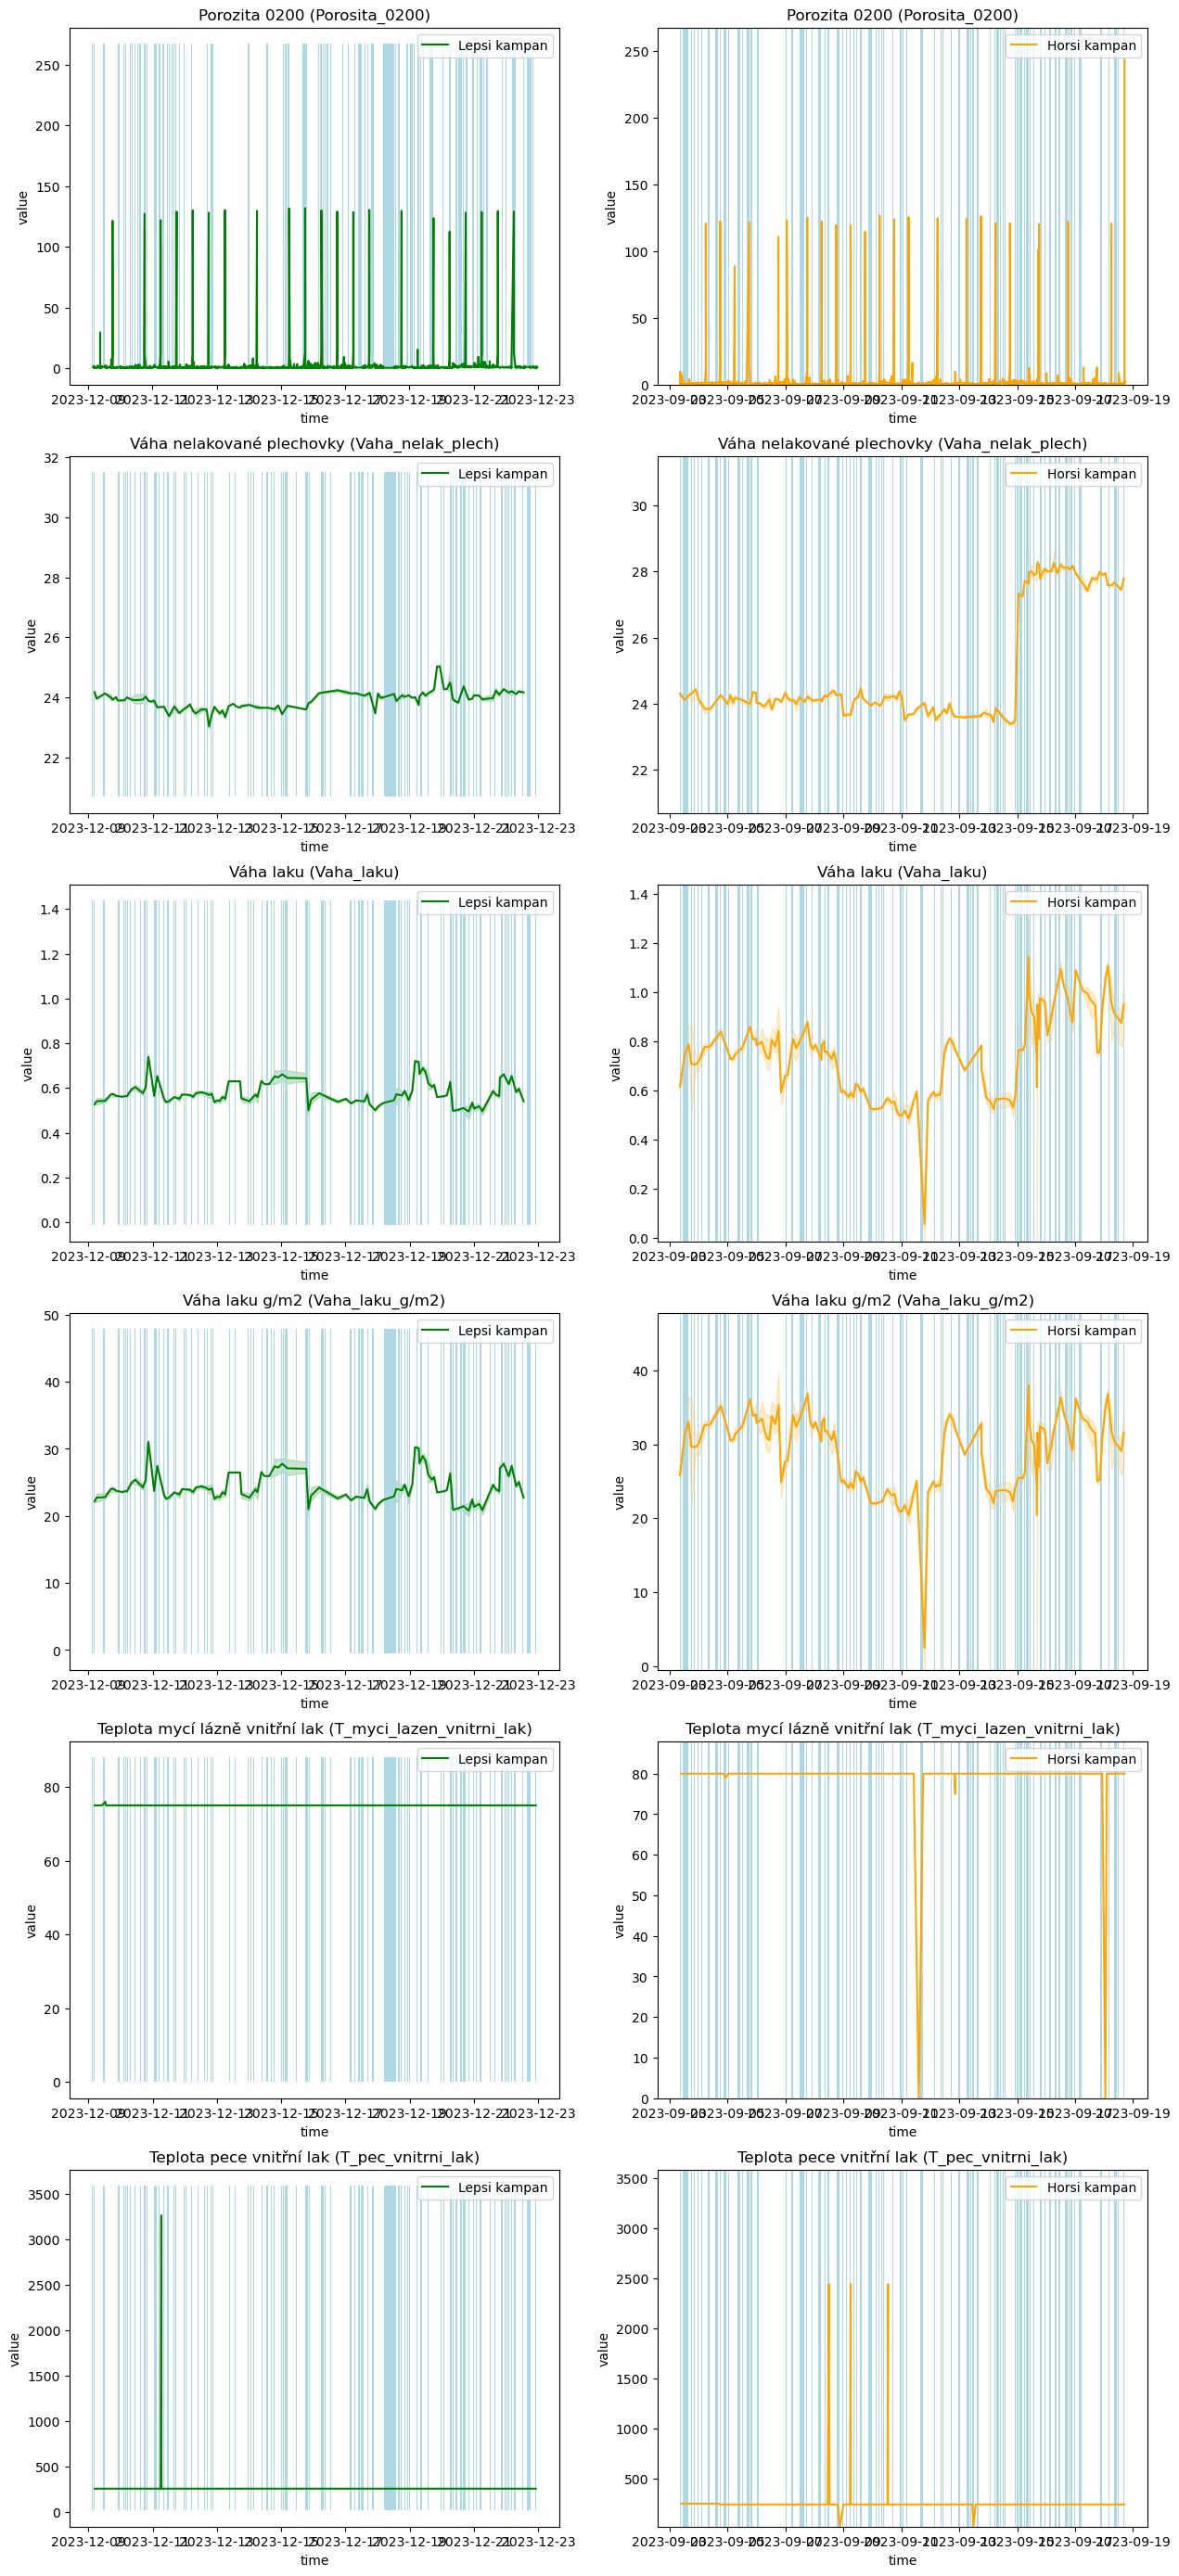

In [7]:
fix, axs = plt.subplots(nrows=len(variables), ncols=2, figsize=(15, 35))
for i, var in enumerate(variables):
    df_sel_lepsi = df_lis_lepsi[df_lis_lepsi["variable"] == var]
    df_sel_horsi = df_lis_horsi[df_lis_horsi["variable"] == var]
    sns.lineplot(data = df_sel_lepsi, x="time", y="value", color="green", label="Lepsi kampan", ax=axs[i][0])
    sns.lineplot(data = df_sel_horsi, x="time", y="value", color="orange", label="Horsi kampan", ax=axs[i][1])
    axs[i][0].set_title(var)
    axs[i][1].set_title(var)
    #[xmin, xmax, ymin, ymax] = axs[i][0].axis() 
    ymin = 0.9*min(df_sel_lepsi["value"].min(), df_sel_horsi["value"].min())
    ymax = 1.1*max(df_sel_lepsi["value"].max(), df_sel_horsi["value"].max())
    axs[i][1].set_ylim(ymin, ymax)

    for _, row in prostoje_lepsi.iterrows():
        if row["Pracoviste"] == WHAT:
            axs[i][0].fill_betweenx(y=[ymin, ymax], x1=row["Start"], x2=row["End"], facecolor="LightBlue")
    for _, row in prostoje_horsi.iterrows():
        if row["Pracoviste"] == WHAT:
            axs[i][1].fill_betweenx(y=[ymin, ymax], x1=row["Start"], x2=row["End"], facecolor="LightBlue")
            
    print(var)
    
plt.savefig(f"prvni_pokus_{WHAT}.png")